In [ ]:
! apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

In [ ]:
pip install SciencePlots

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scienceplots
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
BASE_PATH = '/content/drive/MyDrive/heads_masking_results_v2/results'

**Table prunning heads**

In [ ]:
def compute_prunned_heads(df):
  baseline = df['BLEUs'].values[0]
  df['difference'] = baseline - df['BLEUs']
  df_selected = df.loc[(np.abs(df['difference']) < 2) ]
  n_prunned_heads = df_selected[(df_selected['Thresholds'] == df_selected['Thresholds'].max())]
  return n_prunned_heads['Number of Masked Heads'].values[0]

In [ ]:
srcs=['spa_Latn', 'fra_Latn', 'deu_Latn', 'glg_Latn', 'ita_Latn']
tgts=['eng_Latn', 'cat_Latn', 'por_Latn']
map = {'spa_Latn':'es', 'fra_Latn':'fr', 'deu_Latn':'de', 'glg_Latn':'gl',
       'ita_Latn':'it', 'eng_Latn':'en', 'cat_Latn':'ca', 'por_Latn':'pt'}
prunned_heads = []
for tgt in tgts:
  for src in srcs:
    for model in ['gemma32_distributed', 'gemma128_distributed', 'gemma256_distributed']:
      path = os.path.join(BASE_PATH, model, f'{src}-{tgt}', 'thresholds_bleus_masked_heads.csv')
      try:
        df = pd.read_csv(path)
        num_prunned = compute_prunned_heads(df)
        prunned_heads.append([ '{}-{}'.format(map[src], map[tgt]), model, num_prunned])
      except:
        pass

In [ ]:
table_prunning = pd.DataFrame(prunned_heads, columns = ['src-tgt', 'model', 'N']).pivot(index='src-tgt', columns='model', values='N')

In [ ]:
table_prunning.mean()

model
gemma128_distributed    67.2
gemma256_distributed    88.0
gemma32_distributed     56.0
dtype: float64

In [ ]:
print(table_prunning[['gemma32_distributed', 'gemma128_distributed', 'gemma256_distributed']].to_latex(float_format="%.0f"))

In [ ]:
plt.style.use(['science'])

In [ ]:
df32  = pd.read_csv(os.path.join(BASE_PATH, 'gemma32_distributed', 'spa_Latn-cat_Latn', 'thresholds_bleus_masked_heads.csv'))
df128 = pd.read_csv(os.path.join(BASE_PATH, 'gemma128_distributed', 'spa_Latn-cat_Latn', 'thresholds_bleus_masked_heads.csv'))
df256 = pd.read_csv(os.path.join(BASE_PATH, 'gemma256_distributed', 'spa_Latn-cat_Latn', 'thresholds_bleus_masked_heads.csv'))

In [ ]:
bos = (15 /255 , 157 /255 ,88 /255)
source_tag = (244/255, 180/255, 0/255 )
source_sentence = (66/255, 133/255, 244/255)
target_tag = (219/255, 68/255, 55/255)

bleu_color = (83/255, 109/255, 254/255)
masked_heads_color = (96/255, 125/255, 139/255)

In [ ]:
def plot_data(data, name):
    thresholds = data['Thresholds']
    bleus = data['BLEUs']
    n_masked_heads = data['Number of Masked Heads']
    conf_source_all = data['conf Source']
    cov_source_all = data['cov Source']

    conf_bos_all = data['conf BOS']
    cov_bos_all = data['cov BOS']

    conf_sentence_all = data['conf Sentence']
    cov_sentence_all = data['cov Sentence']

    conf_target_all = data['conf Target']
    cov_target_all = data['cov Target']

    fig, (ax1, ax3, ax4) = plt.subplots(1, 3, figsize=(12, 3.6))

    # Plot BLEU scores and number of masked heads
    color = 'tab:blue'
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('BLEU', color=bleu_color, fontsize=15)
    ax1.plot(thresholds, bleus, marker='o', linewidth=1.5, markersize=5, color=bleu_color)
    ax1.tick_params(axis='y', labelcolor=bleu_color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Number of Masked Heads', color=(55/255, 71/255, 79/255), fontsize=15) #rgb(69, 90, 100)
    ax2.plot(thresholds, n_masked_heads, marker='o', linewidth=1.5, markersize=5, color=masked_heads_color)
    ax2.tick_params(axis='y', labelcolor=masked_heads_color)

    # Plot confidence scores
    ax3.set_xlabel('Threshold')
    ax3.set_ylabel('Confidence', fontsize=15)
    ax3.plot(thresholds, conf_source_all, label='Source tag', marker='s', linewidth=1.5, markersize=5, color=source_tag)
    ax3.plot(thresholds, conf_target_all, label='Target tag', marker='^', linewidth=1.5, markersize=5, color=target_tag)
    ax3.plot(thresholds, conf_sentence_all, label='Source sentence', marker='P', linewidth=1.5, markersize=5, color=source_sentence)
    ax3.plot(thresholds, conf_bos_all, label='BOS', marker='X', linewidth=1.5, markersize=5, color=bos)
    #ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.tick_params(axis='both', which='minor', width=0)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.yaxis.set_ticks_position('left')
    ax3.set_ylim(min(conf_bos_all) - 0.6, max(conf_bos_all) + 1)

    # Plot coverage scores
    ax4.set_xlabel('Threshold')
    ax4.set_ylabel('Coverage', fontsize=15)
    ax4.plot(thresholds, cov_source_all, label='Source', marker='s', linewidth=1.5, markersize=5, color=source_tag)
    ax4.plot(thresholds, cov_target_all, label='Target', marker='^', linewidth=1.5, markersize=5, color=target_tag)
    ax4.plot(thresholds, cov_sentence_all, label='Sentence', marker='P', linewidth=1.5, markersize=5, color=source_sentence)
    ax4.plot(thresholds, cov_bos_all, label='BOS', marker='X', linewidth=1.5, markersize=5, color=bos)
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='both', which='minor', width=0)
    ax4.xaxis.set_ticks_position('bottom')
    ax4.yaxis.set_ticks_position('left')
    ax4.set_ylim(min(cov_bos_all) - 10, max(cov_bos_all) + 14)
    #ax4.legend()

    # Combine legends
    handles1, labels1 = ax3.get_legend_handles_labels()
    handles2, labels2 = ax4.get_legend_handles_labels()
    handles = handles1
    labels = labels1

    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, fontsize=15, markerscale=1.4)

    #fig.suptitle('Masking heads by Coverage BOS + SRC + Sentence + TGT')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{name}.png', dpi = 400)
    plt.show()

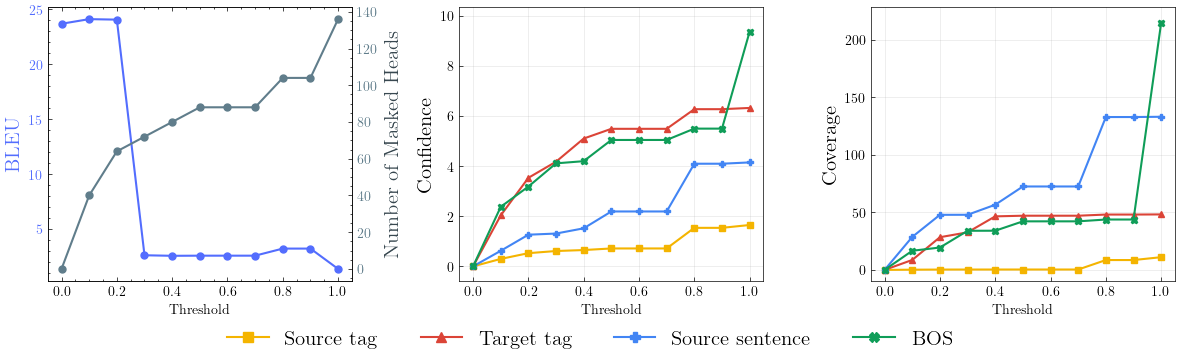

In [ ]:
plot_data(df32, 'prunning32')

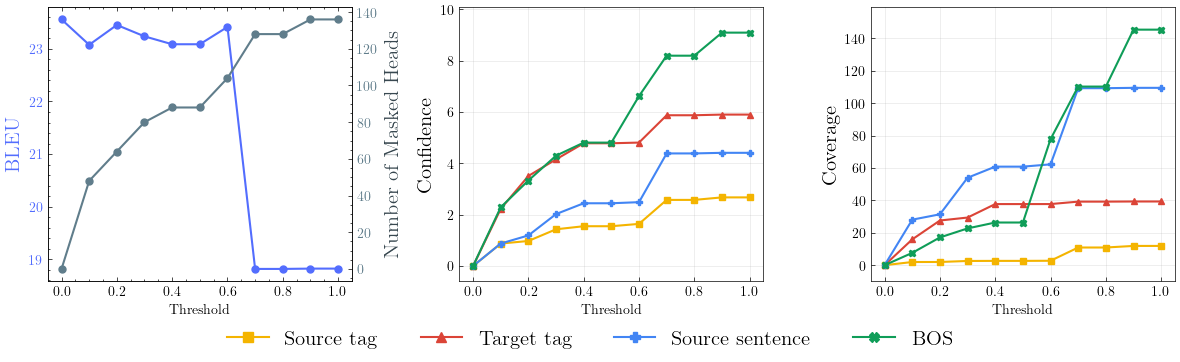

In [ ]:
plot_data(df128, 'prunning128')

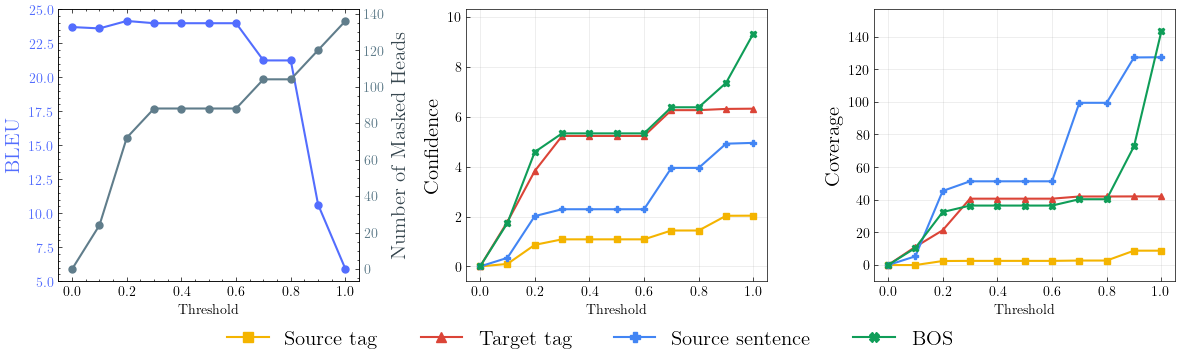

In [ ]:
plot_data(df256, 'prunning256')

In [ ]:
def plot_data_v2(data, name, annot=False, thr=0.3, arrow=False):
    thresholds = data['Thresholds']
    bleus = data['BLEUs']
    n_masked_heads = data['Number of Masked Heads']
    conf_source_all = data['conf Source']
    cov_source_all = data['cov Source']

    conf_bos_all = data['conf BOS']
    cov_bos_all = data['cov BOS']

    conf_sentence_all = data['conf Sentence']
    cov_sentence_all = data['cov Sentence']

    conf_target_all = data['conf Target']
    cov_target_all = data['cov Target']
    red_line = '#D32F2F'
    fig, (ax1, ax4) = plt.subplots(1, 2, figsize=(10, 4.55))

    # Plot BLEU scores and number of masked heads
    color = 'tab:blue'
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('BLEU', color=bleu_color, fontsize=15)
    if annot:
      ax1.axvline(x=thr, linewidth=0.8, color=red_line, linestyle='--')
    ax1.plot(thresholds, bleus, marker='o', linewidth=1.5, markersize=5, color=bleu_color)
    ax1.tick_params(axis='y', labelcolor=bleu_color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Number of Masked Heads', color=(55/255, 71/255, 79/255), fontsize=15) #rgb(69, 90, 100)
    ax2.plot(thresholds, n_masked_heads, marker='o', linewidth=1.5, markersize=5, color=masked_heads_color)
    ax2.tick_params(axis='y', labelcolor=masked_heads_color)

    if arrow:
      ax1.annotate('64 heads\nLayers: 1, 2, 3, 4, 7, 12, 13, 14, 17', xy=(0.2, 12), xytext=(0.4, 10),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linestyle='--'),
                  fontsize=10, color='black')

    # Plot coverage scores
    print('[Coverage all Source]: {:.3}'.format( (cov_source_all.values[2]/cov_source_all.values[-1 ]) * 100) )
    print('[Coverage all Target]: {:.3}'.format( (cov_target_all.values[2]/cov_target_all.values[-1]) *100 ) )
    print('[Coverage all Sentence]: {:.3}'.format( (cov_sentence_all.values[2]/cov_sentence_all.values[-1]) *100) )
    print('[Coverage all BOS]: {:.3}'.format( (cov_bos_all.values[2]/cov_bos_all.values[-1])*100 ) )

    ax4.set_xlabel('Threshold')
    ax4.set_ylabel('Coverage', fontsize=15)
    if annot:
      ax4.axvline(x=thr, linewidth=0.8, color=red_line, linestyle='--')
    ax4.plot(thresholds, cov_source_all, label='Source', marker='s', linewidth=1.5, markersize=5, color=source_tag)
    ax4.plot(thresholds, cov_target_all, label='Target', marker='^', linewidth=1.5, markersize=5, color=target_tag)
    ax4.plot(thresholds, cov_sentence_all, label='Sentence', marker='P', linewidth=1.5, markersize=5, color=source_sentence)
    ax4.plot(thresholds, cov_bos_all, label='BOS', marker='X', linewidth=1.5, markersize=5, color=bos)
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='both', which='minor', width=0)
    ax4.xaxis.set_ticks_position('bottom')
    ax4.yaxis.set_ticks_position('left')
    ax4.set_ylim(min(cov_bos_all) - 10, max(cov_bos_all) + 14)
    #ax4.legend()

    # Combine legends
    handles, labels = ax4.get_legend_handles_labels()

    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.781, -0.06), ncol=4, fontsize=10, markerscale=1.4)

    #fig.suptitle('Masking heads by Coverage BOS + SRC + Sentence + TGT')
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{name}.png', dpi = 400)
    plt.show()

[Coverage all Source]: 2.61
[Coverage all Target]: 58.9
[Coverage all Sentence]: 36.0
[Coverage all BOS]: 9.05


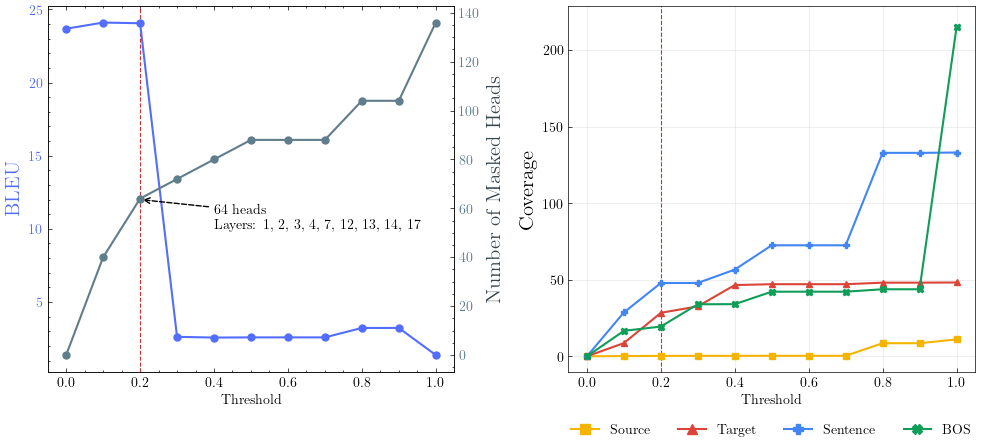

In [ ]:
plot_data_v2(df32, 'prunning32_v2', annot=True, thr=0.2, arrow=True)

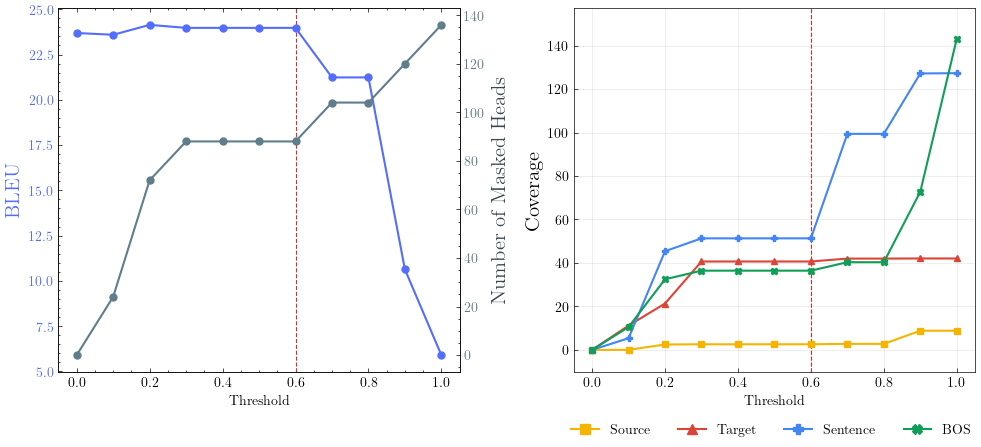

In [ ]:
plot_data_v2(df256, 'prunning256_v2', annot=True)

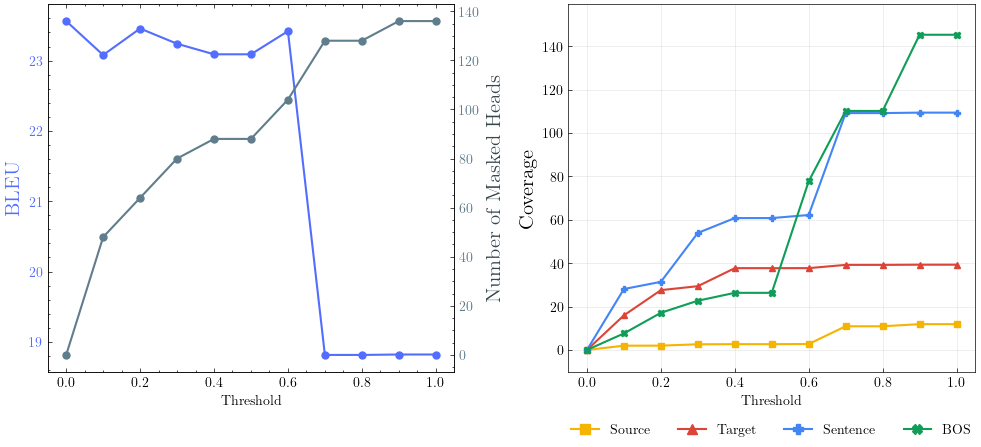

In [ ]:
plot_data_v2(df128, 'prunning128_v2', annot=False)